## import 库

In [1]:
# 1
%matplotlib inline
import numpy as np
import pandas as pd
import os,sys
import utilities as utils
import matplotlib.pyplot as plt

## 从csv读取DataFrame

In [3]:
# 2
ori_path = '/home/esmidth/github/DCS/Original_Data/Sensorscope/luce_stations/'
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
file_list = os.listdir(ori_path)
name = [
'Station ID',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second',
'Time since the epoch [s]',
'Sequence Number',
'Ambient Temperature',
'Surface Temperature',
'Solar Radiation',
'Relative Humidity [%]',
'Soil Moisture [%]',
'Watermark [kPa]',
'Rain Meter [mm]',
'Wind Speed [m/s]',
'Wind Direction [°]',
]

FileNotFoundError: [Errno 2] No such file or directory: '/home/esmidth/github/DCS/Original_Data/Sensorscope/luce_stations/'

In [3]:
# 3
df_sum = pd.DataFrame()
sum = 0
for file in file_list:
    if '.txt'in file:
        df = pd.read_csv(ori_path+file,sep=' ',names=name)
        df_sum = pd.concat([df_sum,df],axis=0)
        sum += len(df)
        print(file,'Done')

sensorscope-meteo-99.txt Done
sensorscope-meteo-87.txt Done
sensorscope-meteo-17.txt Done
sensorscope-meteo-53.txt Done
sensorscope-meteo-68.txt Done
sensorscope-meteo-24.txt Done
sensorscope-meteo-39.txt Done
sensorscope-meteo-85.txt Done
sensorscope-meteo-34.txt Done
sensorscope-meteo-49.txt Done
sensorscope-meteo-42.txt Done
sensorscope-meteo-104.txt Done
sensorscope-meteo-95.txt Done
sensorscope-meteo-96.txt Done
sensorscope-meteo-32.txt Done
sensorscope-meteo-40.txt Done
sensorscope-meteo-23.txt Done
sensorscope-meteo-18.txt Done
sensorscope-meteo-60.txt Done
sensorscope-meteo-25.txt Done
sensorscope-meteo-37.txt Done
sensorscope-meteo-122.txt Done
sensorscope-meteo-79.txt Done
sensorscope-meteo-56.txt Done
sensorscope-meteo-31.txt Done
sensorscope-meteo-100.txt Done
sensorscope-meteo-10.txt Done
sensorscope-meteo-97.txt Done
sensorscope-meteo-94.txt Done
sensorscope-meteo-11.txt Done
sensorscope-meteo-70.txt Done
sensorscope-meteo-59.txt Done
sensorscope-meteo-82.txt Done
sensors

In [4]:
df_sum.to_hdf('data_ori.h5',key='df',mode='w')

In [5]:
df_sum = pd.read_hdf('r_data_files/data_ori.h5','df')

## 绘制有效数据点

In [6]:
# 4
lat = (46.51788,46.52227)
log = (6.56517,6.5693)

loc_file = '/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/EPFL_sensor_loc_simple2.xlsx'
df = pd.read_excel(loc_file)

lat_range = np.linspace(lat[0],lat[1],11)
log_range = np.linspace(log[0],log[1],11)
# print(lat_range)
# print(log_range)

## 尝试找到重复点的ID对

In [7]:
# 5
def draw_lune_heatmap(df,res,lat=lat,log=log):
    lat_range = np.linspace(lat[1],lat[0],res+1)
    log_range = np.linspace(log[0],log[1],res+1)
    pic = np.zeros((res,res))
    pic2 = np.zeros((res,res))
    pairs = []
    for i in range(res):
        # print(i,lat_range[i],lat_range[i+1])
        for j in range(res):
            sub_df = df[(df['Latitude'] < lat_range[i]) & (df['Latitude'] > lat_range[i+1]) & (df['Longitude'] > log_range[j]) & (df['Longitude'] < log_range[j+1])]
            pic[i][j] = len(sub_df)
            if len(sub_df) > 0:
                pic2[i][j]=1
            # pic[i][j] = i*res+j
            if len(sub_df) > 1:
                pairs.append([i*res+j,sub_df['ID'].values])
            max_value = 0
            max_id = 0
            for value in sub_df['ID'].values:
                # print(value)
                if len(sub_df[sub_df['ID'] == value]) > max_value:
                    max_id =value
            pic[i][j] = max_id
    return pic,pairs,pic2
# 输出的pic有颜色明暗，pic2为黑白两色

[[14, array([ 3, 23, 42])], [15, array([ 5, 17])], [24, array([21, 26, 41])], [25, array([14, 30, 39, 56])], [26, array([  9,  15,  18,  24,  37,  44, 105, 121])], [27, array([12, 45, 46])], [28, array([ 8, 25, 36])], [33, array([64, 75, 99])], [36, array([13, 40])], [37, array([ 34,  43, 106])], [53, array([ 70, 122])], [54, array([49, 68])], [63, array([66, 72])], [64, array([54, 73])], [66, array([ 32,  35,  50,  94, 107])], [69, array([79, 95])], [75, array([92, 97])], [77, array([33, 53])], [78, array([10, 19])], [91, array([85, 89])]]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 63.   0.   0.   0.  42.  17.   0.   0.   0.   0.]
 [ 47.   7.  27.   0.  41.  56. 121.  46.  36.   0.]
 [  0.   0. 111.  99.  57.  59.  40. 106.   0.   0.]
 [  0.  61.  71.  65.   0.  82.  62.   0.  76.   0.]
 [  0.  51.  11. 122.  68.   0.   0.  60.   0.   0.]
 [ 84.  81.  55.  72.  73.   0. 107.  31.  69.  95.]
 [103.  80.  96.   0.   0.  97. 100.  53.  19.  93.]
 [109.  87.   0.   0. 104.   

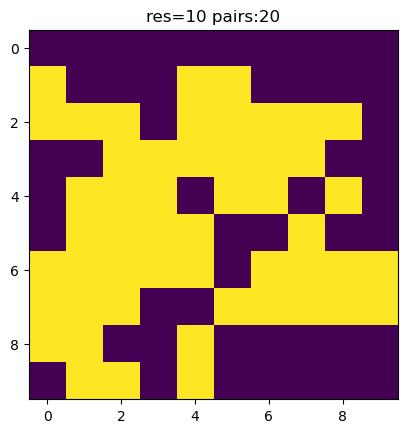

In [8]:
# 6
res = 10
pic,pairs,pic2 = draw_lune_heatmap(df,res,lat,log)
plt.title('res='+str(res)+' pairs:'+str(len(pairs)))
plt.grid(b=False)
plt.imshow(pic2)
print(pairs)
print(pic)

## 重复的点处理（当前方式，采用数据最多的点），较为粗略的处理方式

In [ ]:
plt.imshow(pic)
plt.figure()
plt.imshow(pic2)

In [ ]:
for pair in pairs:
    print(pair[0],pair[1])

In [9]:
# 7
sub_prefix = 'sensorscope-meteo-'
sub_suffix = '.txt'
def concat_dataframe(num_list):
    # df_sum = pd.DataFrame()
    max_length = 0
    max_df = None
    max_num = 0
    for i,num in enumerate(num_list):
        file = ori_path+sub_prefix+str(num)+sub_suffix
        df = pd.read_csv(file,sep=' ',names=name)
        print(file,len(df))
        if len(df) > max_length:
            max_length = len(df)
            max_df = df
            max_num = i
    return max_df,max_num

In [10]:
# 8
num_list = []
for pair in pairs:
    print(pair[1])
    df,num = concat_dataframe(pair[1])
    num_list.append(np.delete(pair[1],num))

[ 3 23 42]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-3.txt 463366
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-23.txt 508496
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-42.txt 476141
[ 5 17]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-5.txt 473401
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-17.txt 508058
[21 26 41]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-21.txt 516111
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-26.txt 523660
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-41.txt 492508
[14 30 39 56]
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-14.txt 507791
/home/esmidth/code/DCS

In [11]:
print(num_list)

[array([ 3, 42]), array([5]), array([21, 41]), array([30, 39, 56]), array([  9,  15,  18,  24,  37,  44, 105]), array([12, 45]), array([25, 36]), array([64, 99]), array([13]), array([ 43, 106]), array([122]), array([68]), array([66]), array([54]), array([ 32,  50,  94, 107]), array([95]), array([92]), array([53]), array([10]), array([85])]


In [12]:
# 9 此列表为丢弃列表，所以为反逻辑
num_list = np.array(num_list)
new_list = num_list.squeeze()

/home/esmidth/.pyenv/versions/miniconda3-4.7.12/envs/ccs_ta/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
new_list

In [13]:
# 10
ab = []
for a in new_list:
    for b in a:
        ab.append(b)

In [14]:
ab

[3,
 42,
 5,
 21,
 41,
 30,
 39,
 56,
 9,
 15,
 18,
 24,
 37,
 44,
 105,
 12,
 45,
 25,
 36,
 64,
 99,
 13,
 43,
 106,
 122,
 68,
 66,
 54,
 32,
 50,
 94,
 107,
 95,
 92,
 53,
 10,
 85]

In [16]:
len(ab)

37

In [ ]:
print(sorted(ab),len(ab))

In [ ]:
print(pairs)

In [18]:
# 11
total=df_sum['Station ID'].values
diff = np.setdiff1d(total,ab)
print(diff,len(diff))

[  7   8  11  14  17  19  23  26  27  31  33  34  35  40  46  47  49  51
  55  57  59  60  61  62  63  65  69  70  71  72  73  75  76  79  80  81
  82  84  87  88  89  93  96  97  98 100 103 104 109 111 121] 51


In [19]:
total_uniq = np.unique(total)
print(total_uniq, len(total_uniq))

[  3   5   7   8   9  10  11  12  13  14  15  17  18  19  21  23  24  25
  26  27  30  31  32  33  34  35  36  37  39  40  41  42  43  44  45  46
  47  49  50  51  53  54  55  56  57  59  60  61  62  63  64  65  66  68
  69  70  71  72  73  75  76  79  80  81  82  84  85  87  88  89  92  93
  94  95  96  97  98  99 100 103 104 105 106 107 109 111 121 122] 88


In [12]:
# 12
dfs = pd.DataFrame()
for dif in diff:
    file = ori_path+sub_prefix+str(dif)+sub_suffix
    df_tmp = pd.read_csv(file,sep=' ',names=name)
    dfs = pd.concat([dfs,df_tmp],axis=0)
    print(file,'Done',len(df_tmp),len(dfs))

/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-7.txt Done 131753 131753
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-8.txt Done 508506 640259
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-11.txt Done 474258 1114517
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-14.txt Done 507791 1622308
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-17.txt Done 508058 2130366
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-19.txt Done 468463 2598829
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-23.txt Done 508496 3107325
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stations/sensorscope-meteo-26.txt Done 523660 3630985
/home/esmidth/code/DCS_COPY/DCS/Original_Data/Sensorscope/luce_stati

In [ ]:

dfs.to_hdf('data.h5',key='dfs',mode='w')
# df_tst.to_hdf('data.h5',key='dff',mode='w')

## 从hdf读取dataframe

In [ ]:
dfs = pd.read_hdf('data.h5','dfs')
print(dfs.info(memory_usage='deep'))

In [ ]:
print(dfs['Wind Direction [°]'].describe())

In [13]:
# 13
# 统计 每一列 Nan的个数,百分比
print("na_percent:\t valid_nums \t column_name")
for column in dfs.columns:
    # print(column,dfs[column].isna().sum())
    na_num = dfs[column].isna().sum()
    total_num = dfs[column].shape[0]
    print("{1:.3f}%: \t {2} \t {0}".format(column,na_num*100/total_num,total_num-na_num))

na_percent:	 valid_nums 	 column_name
0.000%: 	 21797635 	 Station ID
0.000%: 	 21797635 	 Year
0.000%: 	 21797635 	 Month
0.000%: 	 21797635 	 Day
0.000%: 	 21797635 	 Hour
0.000%: 	 21797635 	 Minute
0.000%: 	 21797635 	 Second
0.000%: 	 21797635 	 Time since the epoch [s]
0.000%: 	 21797635 	 Sequence Number
4.087%: 	 20906717 	 Ambient Temperature
1.802%: 	 21404777 	 Surface Temperature
86.315%: 	 2983006 	 Solar Radiation
4.015%: 	 20922440 	 Relative Humidity [%]
86.052%: 	 3040423 	 Soil Moisture [%]
88.500%: 	 2506651 	 Watermark [kPa]
94.795%: 	 1134469 	 Rain Meter [mm]
98.215%: 	 389006 	 Wind Speed [m/s]
86.360%: 	 2973239 	 Wind Direction [°]


In [ ]:
# 14
df_sub = dfs.drop(['Solar Radiation','Soil Moisture [%]','Watermark [kPa]','Rain Meter [mm]','Wind Speed [m/s]','Wind Direction [°]'],axis=1)

In [ ]:
# 15
df_sub.to_hdf('data.h5',key='df_sub',mode='w')